In [ ]:
#Linear regression file

In [355]:
import warnings
warnings.filterwarnings('ignore')


In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [367]:
insurance_data=pd.read_csv("data\\insurance.csv")

In [369]:
# To checking the Null values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

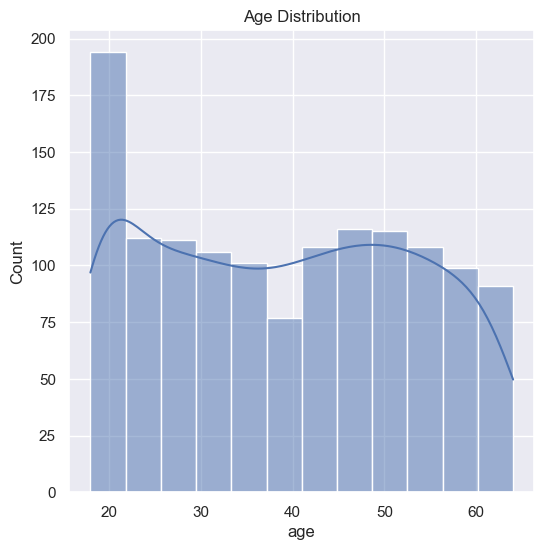

In [371]:
 #distribution of age Value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['age'],kde=True)
plt.title('Age Distribution')
plt.show()


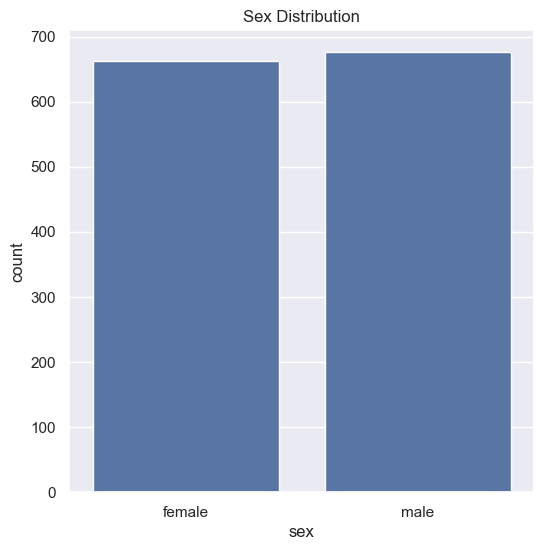

In [373]:
 #Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [375]:
insurance_data['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

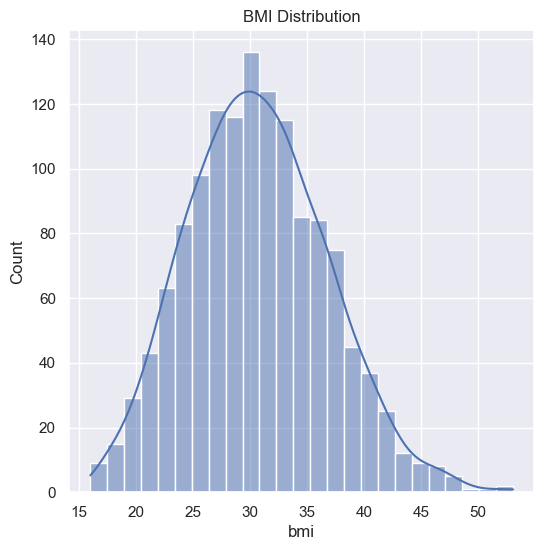

In [377]:
#Bmi distibution
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()
#

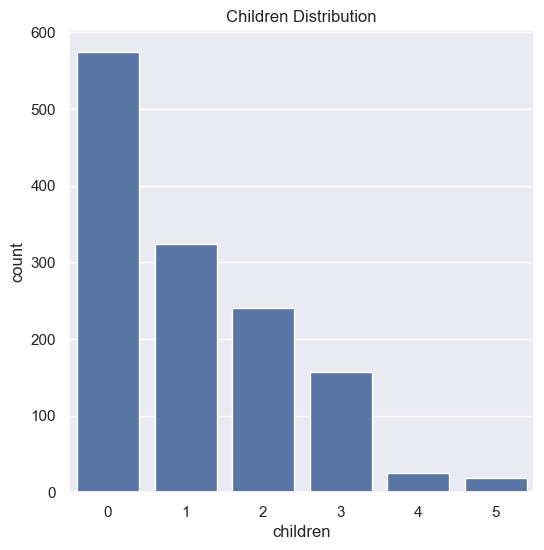

In [379]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children Distribution')
plt.show()

In [381]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

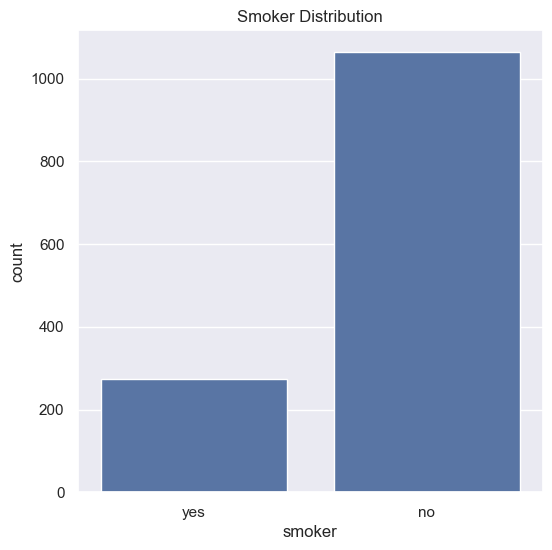

In [385]:
#smoker columns
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()
#

In [387]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

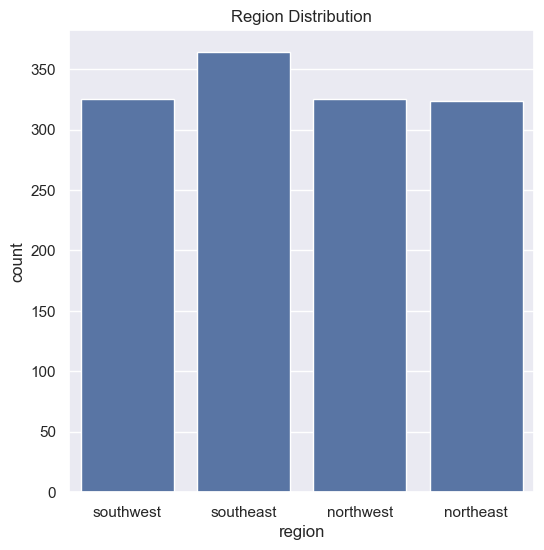

In [389]:
 #region columns
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')
plt.show()


In [391]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

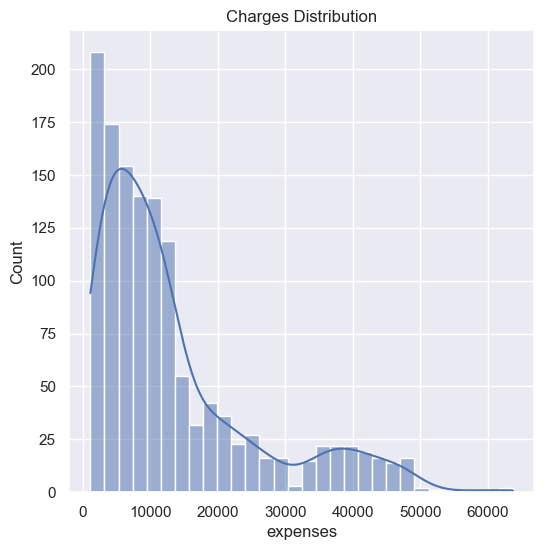

In [395]:
# Charges values
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['expenses'],kde=True)
plt.title('Charges Distribution')
plt.show()


In [397]:
#Data PreProcessing

In [401]:
#Encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
#Encoding Smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#Encoding Region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [403]:
#Spliting Features and Target

In [407]:
X=insurance_data.drop(columns='expenses',axis=1)
Y=insurance_data['expenses']


In [409]:
 print(X)


      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       1
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       3
4      32    0  28.9         0       1       3
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       3
1334   18    1  31.9         0       1       2
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       0       3

[1338 rows x 6 columns]


In [411]:
print(Y)


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [413]:
#Spliting Training and Testing data

In [415]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [417]:
print(X.shape,X_train.shape,X_test.shape)


(1338, 6) (1070, 6) (268, 6)


In [419]:
#Model Building

In [423]:
from sklearn.linear_model import LinearRegression

In [425]:
Linear_reg=LinearRegression()

In [427]:
Linear_reg.fit(X_train,Y_train)

LinearRegression()

In [429]:
#Model Evaluation

In [431]:
#Prediction on Training data
prediction_on_training_data=Linear_reg.predict(X_train)

In [433]:
#R sqaurred
r2_train=metrics.r2_score(Y_train,prediction_on_training_data)
print('R squared value :',r2_train)

R squared value : 0.7515233180624387


In [435]:
#Prediction on test data
prediction_on_test_data=Linear_reg.predict(X_test)


In [437]:
r2_test=metrics.r2_score(Y_test,prediction_on_test_data)
print('R squared value :',r2_test)

R squared value : 0.7447382074449773


In [439]:
#Building Predictive Systems

In [441]:
input_data=(31,1,25.74,0,1,0)
#changing input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=Linear_reg.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is ',prediction[0])

[3759.33603725]
The insurance cost is  3759.3360372503485


In [181]:
#linear Regression

In [18]:
insurance.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [20]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
insurance.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [24]:
insurance.shape

(1338, 7)

In [26]:
#Point to note
#Dataset has 1338 rows and 7 columns.

#Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

#We will analyse and finalize whether to convert them to categorical or treat as integer.

In [30]:
#percentage of missing value in each column
round(100*(insurance.isnull().sum()/len(insurance)),2).sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [32]:
#percentage of missing value in each row
round(100*(insurance.isnull().sum(axis=1)/len(insurance)),2).sort_values(ascending=False)[:5]

0      0.0
898    0.0
896    0.0
895    0.0
894    0.0
dtype: float64

In [34]:
#Finding
#There are no missing / Null values either in columns or rows

In [36]:
#Duplicate Check

In [42]:
insurance_dub=insurance.copy()
#checking for duplicates and dropping the entire duplicate row if any
insurance_dub.drop_duplicates(subset=None,inplace=True)

In [48]:
insurance_dub.shape

(1337, 7)

In [54]:
insurance.shape

(1338, 7)

In [ ]:
#Insights
#The shape after running the drop duplicate command is same as the original dataframe.

#Hence we can conclude that there were zero duplicate values in the dataset.

In [56]:
#Data Cleaning
#Checking value_counts() for entire dataframe.

#This will help to identify any Unknow/Junk values present in the dataset.

In [60]:
for col in insurance:
    print(insurance[col].value_counts(ascending=False),'\n\n\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64 



sex
male      676
female    662
Name: count, dtype: int64 



bmi
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: count, Length: 275, dtype: int64 



children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 



smoker
no     1064
yes     274
Name: count, dtype: int64 



region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



expenses
1639.56     2
16884.92    1
29330.98    1
222

In [62]:
#Insights
#There seems to be no Junk/Unknown values in the entire dataset.

In [64]:
#Creating Dummy Variables
#We will create DUMMY variables for 4 categorical variables 'sex','children','smoker' & 'region'.

#Before creating dummy variables, we will have to convert them into 'category' data types.

In [66]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
#convert to category data type
insurance['sex']=insurance['sex'].astype('category')
insurance['smoker']=insurance['smoker'].astype('category')
insurance['children']=insurance['children'].astype('category')
insurance['region']=insurance['region'].astype('category')


In [72]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
insurance_new=pd.get_dummies(insurance,drop_first=True)
insurance_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   expenses          1338 non-null   float64
 3   sex_male          1338 non-null   bool   
 4   children_1        1338 non-null   bool   
 5   children_2        1338 non-null   bool   
 6   children_3        1338 non-null   bool   
 7   children_4        1338 non-null   bool   
 8   children_5        1338 non-null   bool   
 9   smoker_yes        1338 non-null   bool   
 10  region_northwest  1338 non-null   bool   
 11  region_southeast  1338 non-null   bool   
 12  region_southwest  1338 non-null   bool   
dtypes: bool(10), float64(2), int64(1)
memory usage: 44.6 KB


In [74]:
insurance_new.shape

(1338, 13)

In [76]:
#SPLITTING THE DATA
#Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
#We will use train_test_split method from sklearn package for this

In [78]:
#check the shape before splitting
insurance_new.shape

(1338, 13)

In [82]:
# Check the info before spliting
insurance_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   expenses          1338 non-null   float64
 3   sex_male          1338 non-null   bool   
 4   children_1        1338 non-null   bool   
 5   children_2        1338 non-null   bool   
 6   children_3        1338 non-null   bool   
 7   children_4        1338 non-null   bool   
 8   children_5        1338 non-null   bool   
 9   smoker_yes        1338 non-null   bool   
 10  region_northwest  1338 non-null   bool   
 11  region_southeast  1338 non-null   bool   
 12  region_southwest  1338 non-null   bool   
dtypes: bool(10), float64(2), int64(1)
memory usage: 44.6 KB


In [88]:
from sklearn.model_selection import train_test_split
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed()
df_train,df_test=train_test_split(insurance_new,train_size=0.70,test_size=0.30,random_state=100)

In [90]:
#Verify the info and shape of the dataframes after split:

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   expenses          936 non-null    float64
 3   sex_male          936 non-null    bool   
 4   children_1        936 non-null    bool   
 5   children_2        936 non-null    bool   
 6   children_3        936 non-null    bool   
 7   children_4        936 non-null    bool   
 8   children_5        936 non-null    bool   
 9   smoker_yes        936 non-null    bool   
 10  region_northwest  936 non-null    bool   
 11  region_southeast  936 non-null    bool   
 12  region_southwest  936 non-null    bool   
dtypes: bool(10), float64(2), int64(1)
memory usage: 38.4 KB


In [94]:
df_train.shape

(936, 13)

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 12 to 1164
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               402 non-null    int64  
 1   bmi               402 non-null    float64
 2   expenses          402 non-null    float64
 3   sex_male          402 non-null    bool   
 4   children_1        402 non-null    bool   
 5   children_2        402 non-null    bool   
 6   children_3        402 non-null    bool   
 7   children_4        402 non-null    bool   
 8   children_5        402 non-null    bool   
 9   smoker_yes        402 non-null    bool   
 10  region_northwest  402 non-null    bool   
 11  region_southeast  402 non-null    bool   
 12  region_southwest  402 non-null    bool   
dtypes: bool(10), float64(2), int64(1)
memory usage: 16.5 KB


In [98]:
df_test.shape

(402, 13)

In [100]:
#EXPLORATORY DATA ANALYSIS¶

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   expenses          936 non-null    float64
 3   sex_male          936 non-null    bool   
 4   children_1        936 non-null    bool   
 5   children_2        936 non-null    bool   
 6   children_3        936 non-null    bool   
 7   children_4        936 non-null    bool   
 8   children_5        936 non-null    bool   
 9   smoker_yes        936 non-null    bool   
 10  region_northwest  936 non-null    bool   
 11  region_southeast  936 non-null    bool   
 12  region_southwest  936 non-null    bool   
dtypes: bool(10), float64(2), int64(1)
memory usage: 38.4 KB


In [104]:
df_train.columns

Index(['age', 'bmi', 'expenses', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

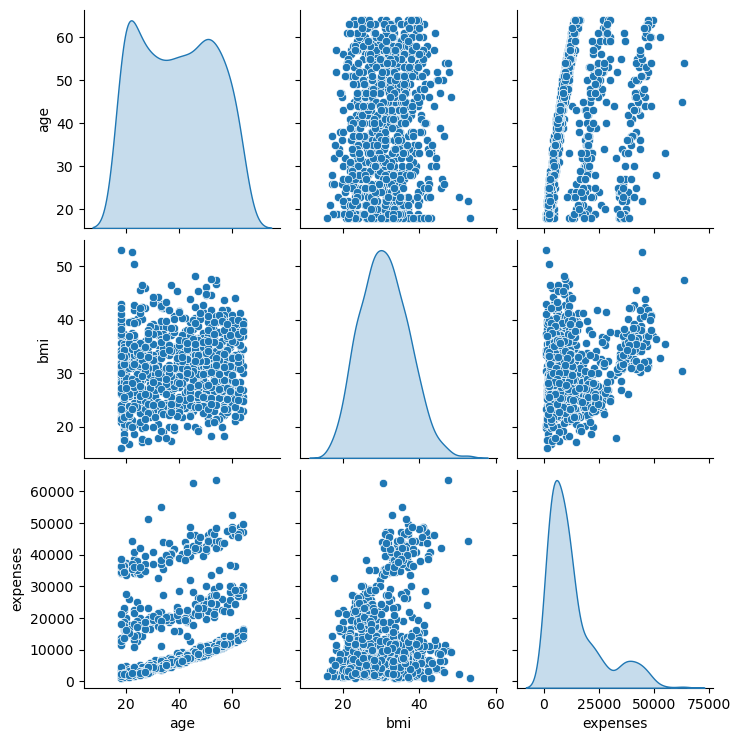

In [116]:
# Create a new dataframe of only numeric variables:
insurance_num=df_train[['age','bmi','expenses']]
sns.pairplot(insurance_num,diag_kind='kde')
plt.show()

In [120]:
#The above Pair-Plot tells us that there is a LINEAR RELATION between 'age','bmi' and 'charges'

In [122]:
#Visualising Catagorical Variables

<function matplotlib.pyplot.show(close=None, block=None)>

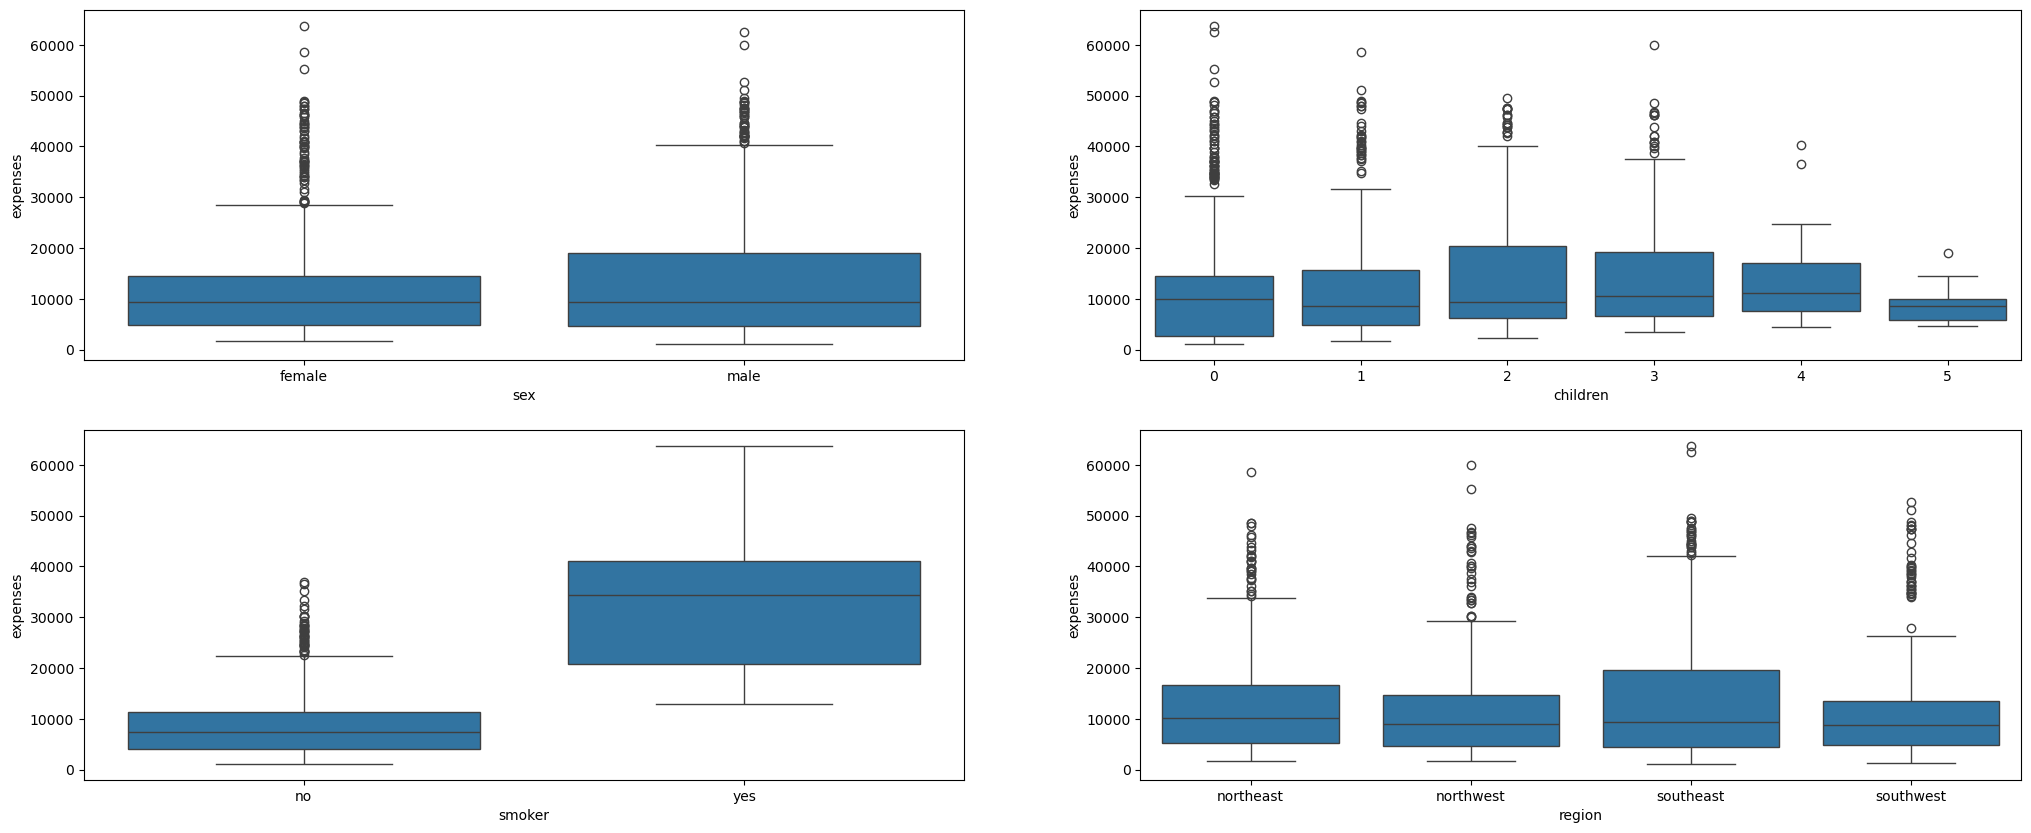

In [128]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='sex', y='expenses',data=insurance)
plt.subplot(2,2,2)
sns.boxplot(x='children', y='expenses',data=insurance)
plt.subplot(2,2,3)
sns.boxplot(x='smoker', y='expenses',data=insurance)
plt.subplot(2,2,4)
sns.boxplot(x='region', y='expenses',data=insurance)
plt.show

In [130]:
#There were 4 categorical variables in the dataset.

#We used Box plot (refer the fig above) to study their effect on the dependent variable (‘charges’) .

#The inference that We could derive were:

#sex: data is bit baised towards male , data is represented as 50.5 : 49.5 for male: female . Interquartile range for male is higher compared to interquartile range for female.

#smoker: 20.5 % of our data are smoker. Median for Smokers are quite high compared to people who don't smoke.

#Children : People have 2 children are having highest data distribution between 50 percentile to 75 percentile among all others.

#Region : Region as Souteast are having highest data distribution between 50 percentile to 75 percentile among all others.

In [132]:
#Correlation Matrix

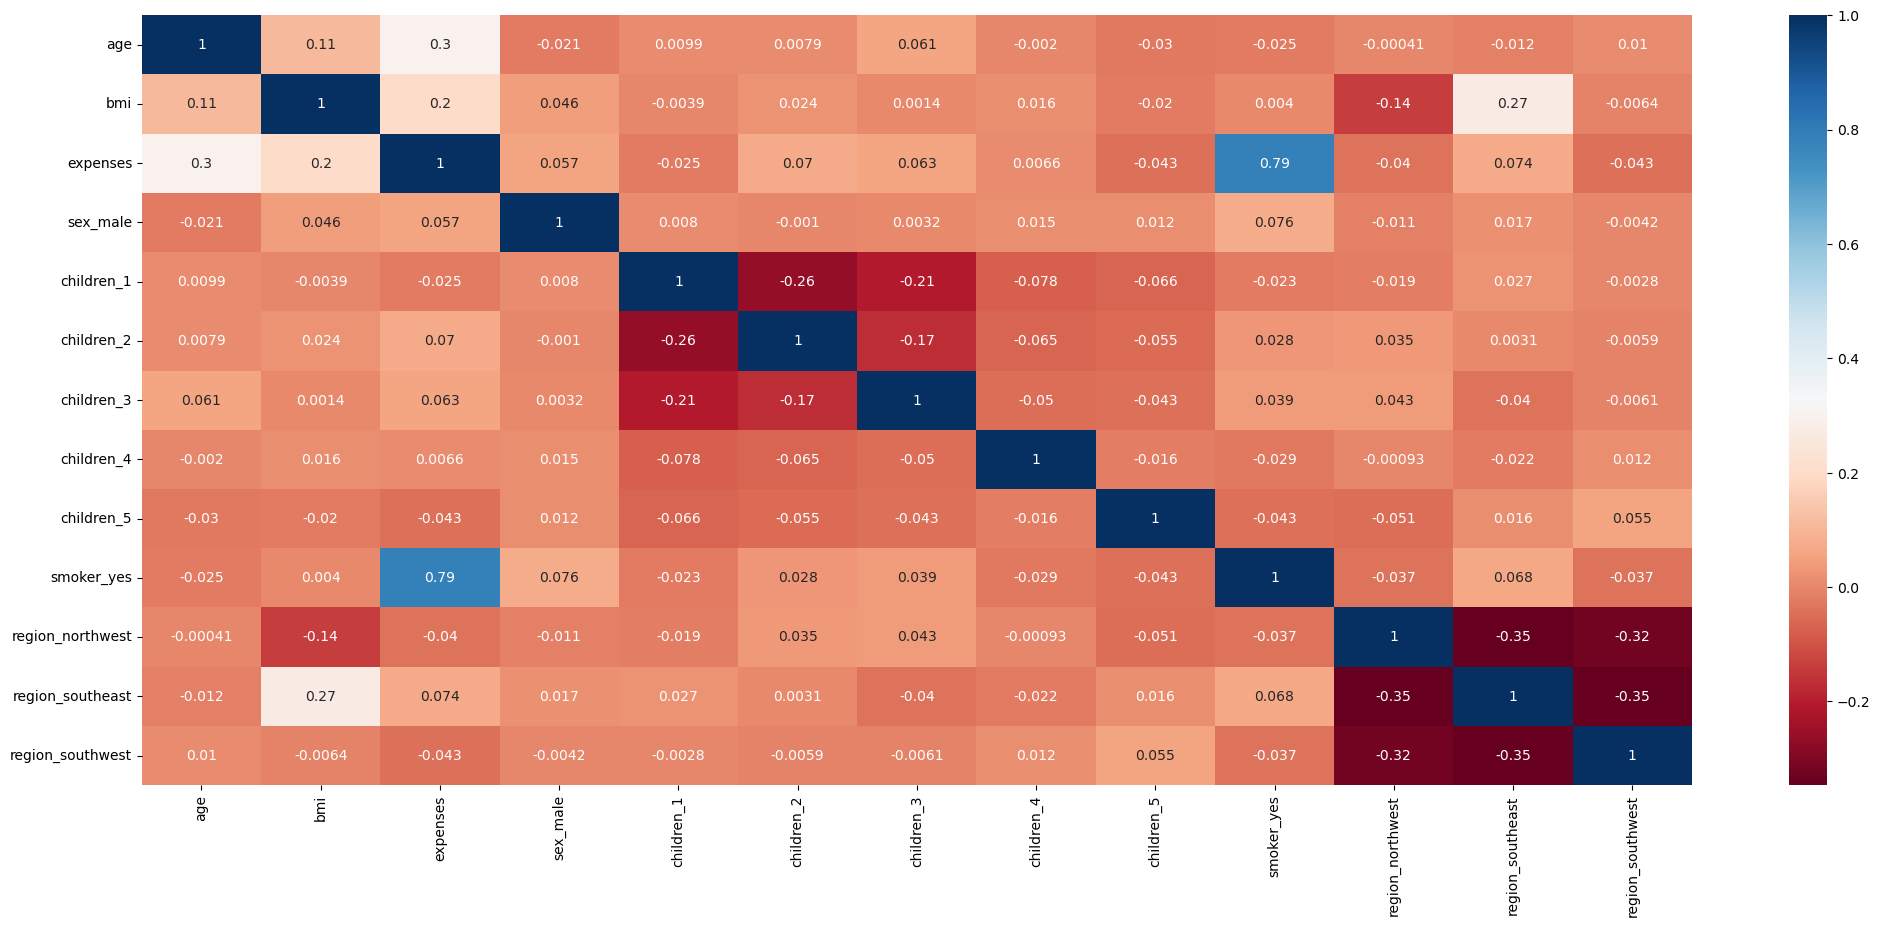

In [136]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: insurance_new) that were chosen for analysis
plt.figure(figsize=(25,10))
sns.heatmap(insurance_new.corr(),annot=True,cmap="RdBu")
plt.show()

In [140]:
#Insights:
#The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
#We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, 
#for identifying the correct variable to select/eliminate from the model.

In [142]:
#RESCALING THE FEATURES

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler= MinMaxScaler()

In [148]:
df_train.head()

age   bmi  expenses  sex_male  children_1  children_2  children_3  \
966    51  24.8  23967.38      True       False        True       False   
522    51  33.9   9866.30     False       False       False       False   
155    44  39.5   6948.70      True       False       False       False   
671    29  31.2   3943.60     False       False       False       False   
1173   38  29.3   6457.84      True       False        True       False   

      children_4  children_5  smoker_yes  region_northwest  region_southeast  \
966        False       False        True              True             False   
522        False       False       False             False             False   
155        False       False       False              True             False   
671        False       False       False             False             False   
1173       False       False       False              True             False   

      region_southwest  
966              False  
522              False  
155              False  
671              False  
1173             False

In [150]:
df_train.columns

Index(['age', 'bmi', 'expenses', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [154]:
# Apply scaler() to all the numeric variables
num_vars=['age','bmi','expenses']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [156]:
# Checking values after scaling
df_train.head()

age       bmi  expenses  sex_male  children_1  children_2  \
966   0.717391  0.237197  0.364661      True       False        True   
522   0.717391  0.482480  0.139579     False       False       False   
155   0.565217  0.633423  0.093008      True       False       False   
671   0.239130  0.409704  0.045041     False       False       False   
1173  0.434783  0.358491  0.085173      True       False        True   

      children_3  children_4  children_5  smoker_yes  region_northwest  \
966        False       False       False        True              True   
522        False       False       False       False             False   
155        False       False       False       False              True   
671        False       False       False       False             False   
1173       False       False       False       False              True   

      region_southeast  region_southwest  
966              False             False  
522              False             False  
155              False             False  
671              False             False  
1173             False             False

In [158]:
df_train.describe()

age         bmi    expenses
count  936.000000  936.000000  936.000000
mean     0.458171    0.398830    0.192301
std      0.306065    0.167424    0.193690
min      0.000000    0.000000    0.000000
25%      0.173913    0.276954    0.055033
50%      0.456522    0.390836    0.129662
75%      0.717391    0.512803    0.245247
max      1.000000    1.000000    1.000000

In [160]:
#BUILDING A LINEAR MODEL

In [162]:
#Dividing into X and Y sets for the model building

In [164]:
y_train = df_train.pop('expenses')
X_train = df_train

In [166]:
#RFE
#Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE 
#(which is a utility from sklearn)

In [168]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [172]:
# Running RFE with the output number of the variable equal to 6
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe= RFE(estimator=lm,n_features_to_select=6)
rfe=rfe.fit(X_train,y_train)

In [174]:
# Running RFE with the output number of the variable equal to 6
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe= RFE(estimator=lm,n_features_to_select=6)
rfe=rfe.fit(X_train,y_train)

In [176]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('sex_male', False, 7),
 ('children_1', False, 6),
 ('children_2', True, 1),
 ('children_3', False, 2),
 ('children_4', True, 1),
 ('children_5', True, 1),
 ('smoker_yes', True, 1),
 ('region_northwest', False, 5),
 ('region_southeast', False, 4),
 ('region_southwest', False, 3)]

In [178]:
col=X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children_2', 'children_4', 'children_5', 'smoker_yes'], dtype='object')

In [180]:
X_train.columns[~rfe.support_]

Index(['sex_male', 'children_1', 'children_3', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [182]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [184]:
#Building Linear Model using 'STATS MODEL'

In [186]:
#Model 1

In [188]:
#VIF

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [204]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a data frame that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
X_train_numeric = X_train_rfe.select_dtypes(include=[float, int])  # Select only numeric columns
vif['Features']=X_train_numeric.columns
vif['VIF']=[variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
0      age  2.69
1      bmi  2.69

In [216]:
import statsmodels.api as sm
import pandas as pd

# Ensure that X_train_rfe and y_train are numeric
# Convert to numeric, forcing errors to NaN, then drop NaN values
X_train_rfe = pd.DataFrame(X_train_numeric).apply(pd.to_numeric, errors='coerce').dropna()
y_train = pd.Series(y_train).apply(pd.to_numeric, errors='coerce').dropna()

# Align X_train_rfe and y_train after dropping NaNs
X_train_rfe, y_train = X_train_rfe.align(y_train, join='inner', axis=0)

# Check if X_train_rfe and y_train are empty after alignment
if X_train_rfe.empty or y_train.empty:
    raise ValueError("After alignment, one of the datasets is empty. Check your input data.")

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [218]:
# Check the parameters obtained

lr1.params

const    0.034972
age      0.184615
bmi      0.182393
dtype: float64

In [220]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     64.22
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           7.43e-27
Time:                        22:33:37   Log-Likelihood:                 269.17
No. Observations:                 936   AIC:                            -532.3
Df Residuals:                     933   BIC:                            -517.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.017      2.059      0.0

In [3]:
#linear Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import pylab as pl
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows',None)

In [7]:
Insurance = pd.read_csv("data\\insurance.csv")
Insurance.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [9]:
Insurance.tail()

age     sex   bmi  children smoker     region  expenses
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

In [11]:
# Dimensions of dataset
Insurance.shape

(1338, 7)

In [13]:
# Number of Elements in dataset
Insurance.size

9366

In [15]:
# Summary of Dataframe
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# Descriptive Statistics of Dataset
Insurance.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.665471     1.094918    NaN        NaN   
std       14.049960   NaN     6.098382     1.205493    NaN        NaN   
min       18.000000   NaN    16.000000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.300000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.000000    NaN        NaN   
max       64.000000   NaN    53.100000     5.000000    NaN        NaN   

            expenses  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422414  
std     12110.011240  
min      1121.870000  
25%      4740.287500  
50%      9382.030000  
75%     16639.915000  
max     63770.430000

In [19]:
# Seperating categorical and numerical variables
Insurance_categorical = Insurance.select_dtypes(include='object')
Insurance_numerical = Insurance.select_dtypes(include=['int','float'])

In [21]:
# Count of unique rows

for i in Insurance[['sex', 'smoker', 'region', 'children']].columns:
    print(i)
    print(Insurance[i].value_counts())
    print('************--------**************')

sex
sex
male      676
female    662
Name: count, dtype: int64
************--------**************
smoker
smoker
no     1064
yes     274
Name: count, dtype: int64
************--------**************
region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
************--------**************
children
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
************--------**************


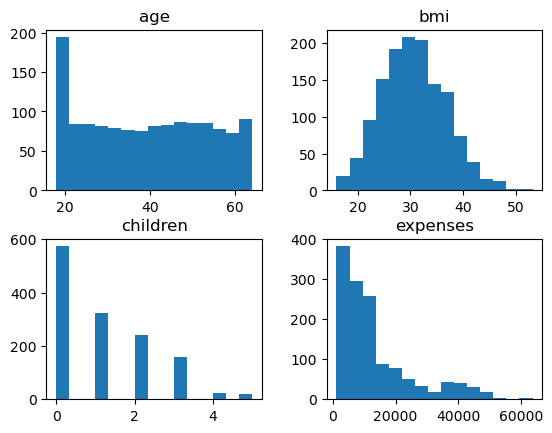

In [23]:
# Distribution of dataset

Insurance.hist(grid=False, bins=15)
plt.show()

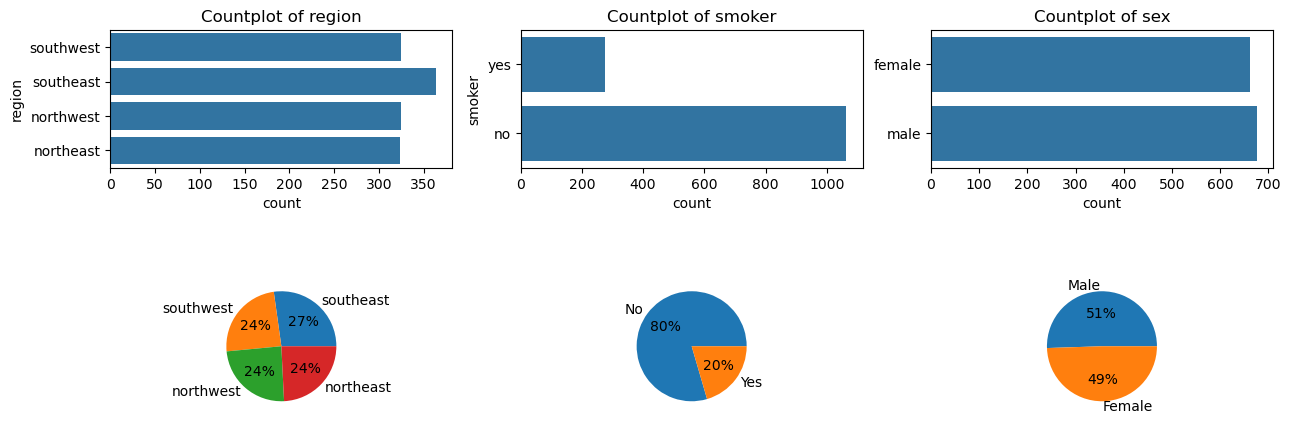

In [25]:
# Countplot of categorical variable

plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
sns.countplot(data=Insurance, y='region')
plt.title('Countplot of region')

plt.subplot(2,3,2)
sns.countplot(data=Insurance, y='smoker')
plt.title('Countplot of smoker')

plt.subplot(2,3,3)
sns.countplot(data=Insurance, y='sex')
plt.title('Countplot of sex')
plt.ylabel('')

plt.subplot(2,3,4)
plt.pie(Insurance_categorical.region.value_counts(), labels=['southeast', 'southwest', 'northwest', 'northeast'], autopct='%.0f%%')

plt.subplot(2,3,5)
plt.pie(Insurance_categorical.smoker.value_counts(), labels=['No', 'Yes'], autopct='%.0f%%')

plt.subplot(2,3,6)
plt.pie(Insurance_categorical.sex.value_counts(), labels=['Male','Female'], autopct='%.0f%%')

pl.subplots_adjust(hspace=0.8)

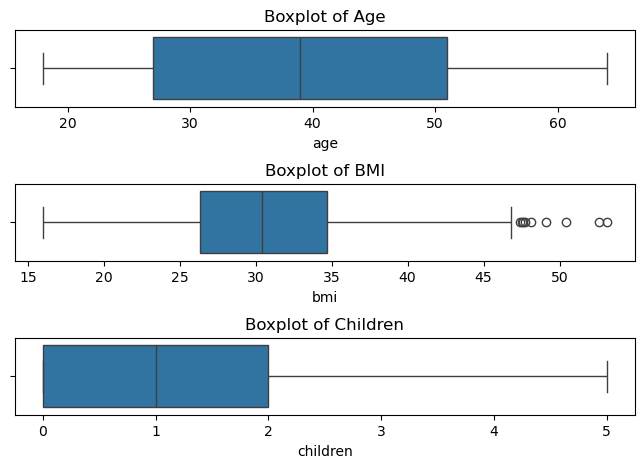

In [27]:
# Boxplot for outliers

plt.figure(figsize=(8,5))

plt.subplot(3,1,1)
sns.boxplot(data=Insurance, x='age', orient='h')
plt.title('Boxplot of Age')

plt.subplot(3,1,2)
sns.boxplot(data=Insurance, x='bmi', orient='h')
plt.title('Boxplot of BMI')

plt.subplot(3,1,3)
sns.boxplot(data=Insurance, x='children', orient='h')
plt.title('Boxplot of Children')
pl.subplots_adjust( hspace=1)

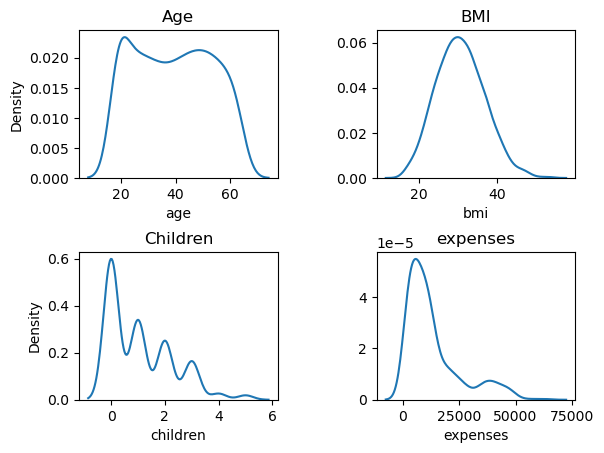

In [29]:
# Distplot for understanding distribution of data

plt.subplot(2,2,1)
sns.distplot(Insurance.age, hist=False)
plt.title('Age')

plt.subplot(2,2,2)
sns.distplot(Insurance.bmi, hist=False)
plt.title('BMI')
plt.ylabel("")

plt.subplot(2,2,3)
sns.distplot(Insurance.children, hist=False)
plt.title('Children')

plt.subplot(2,2,4)
sns.distplot(Insurance.expenses, hist=False)
plt.title('expenses')
plt.ylabel("")

pl.subplots_adjust( hspace=0.5, wspace=0.5)

In [31]:
#Bivariate Analysis

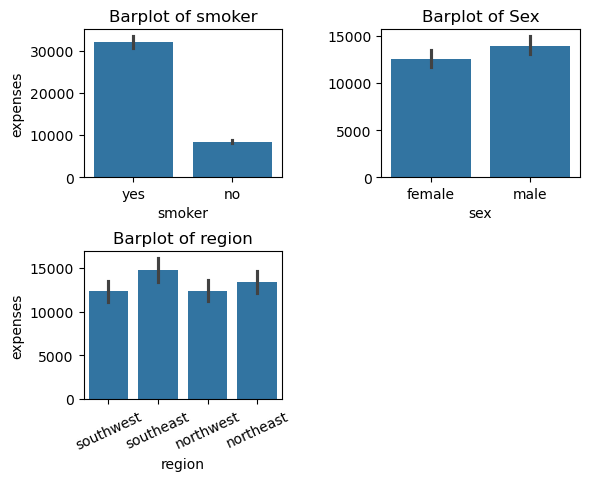

In [33]:
# Barplot of charges and categorical variables

plt.subplot(2,2,1)
sns.barplot(data=Insurance, x='smoker', y='expenses')
plt.title('Barplot of smoker')

plt.subplot(2,2,2)
sns.barplot(data=Insurance, x='sex', y='expenses')
plt.title('Barplot of Sex')
plt.ylabel("")

plt.subplot(2,2,3)
sns.barplot(data=Insurance, x='region', y='expenses')
plt.title('Barplot of region')
plt.xticks(rotation=25)
pl.subplots_adjust( hspace=0.5, wspace=0.5)

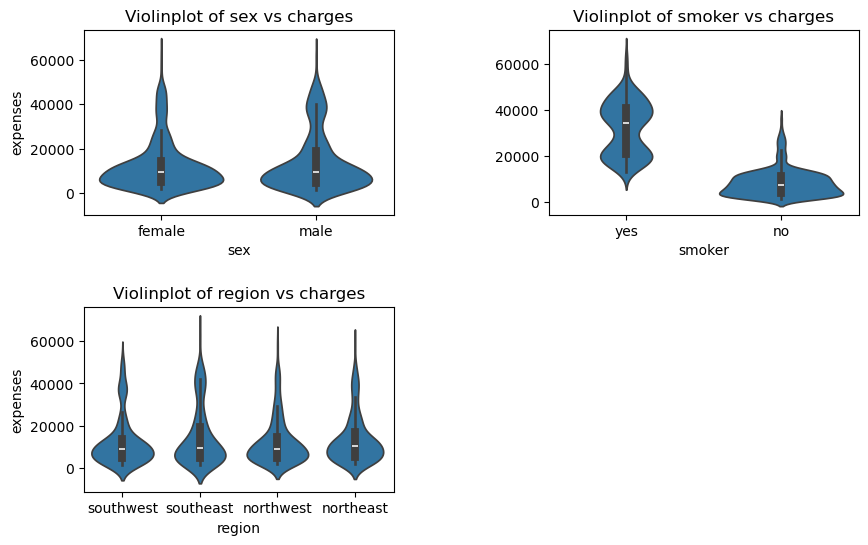

In [37]:
# Violinplot 

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(data=Insurance, x='sex', y='expenses')
plt.title('Violinplot of sex vs charges')

plt.subplot(2,2,2)
sns.violinplot(data=Insurance, x='smoker', y='expenses')
plt.title('Violinplot of smoker vs charges')
plt.ylabel("")

plt.subplot(2,2,3)
sns.violinplot(data=Insurance, x='region', y='expenses')
plt.title('Violinplot of region vs charges')

pl.subplots_adjust( hspace=0.5, wspace=0.5)

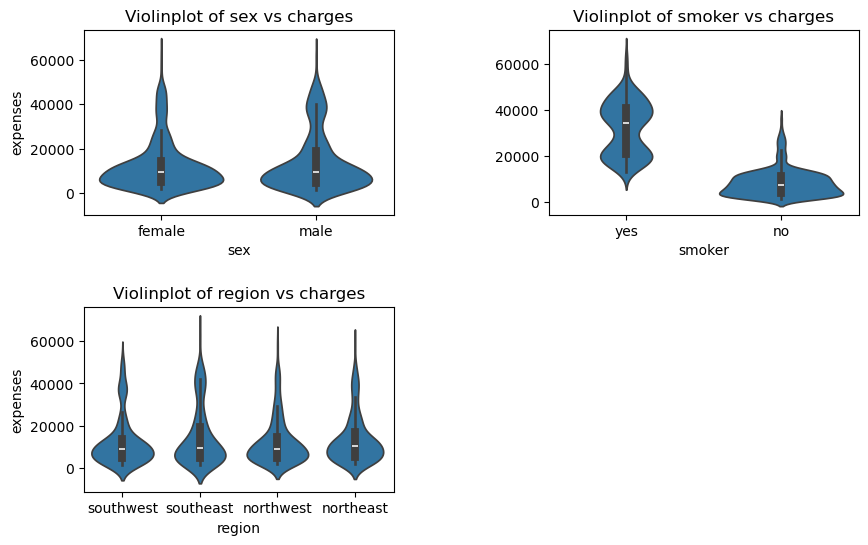

In [39]:
# Violinplot 

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(data=Insurance, x='sex', y='expenses')
plt.title('Violinplot of sex vs charges')

plt.subplot(2,2,2)
sns.violinplot(data=Insurance, x='smoker', y='expenses')
plt.title('Violinplot of smoker vs charges')
plt.ylabel("")

plt.subplot(2,2,3)
sns.violinplot(data=Insurance, x='region', y='expenses')
plt.title('Violinplot of region vs charges')

pl.subplots_adjust( hspace=0.5, wspace=0.5)

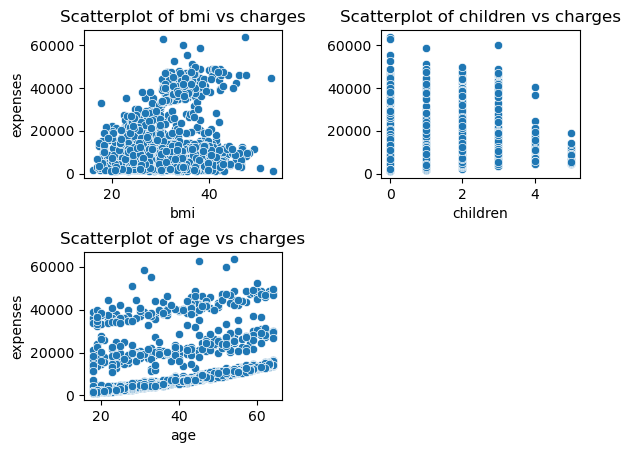

In [41]:
# Scatterplot of numerical variables

plt.subplot(2,2,1)
sns.scatterplot(data=Insurance, x='bmi', y='expenses')
plt.title('Scatterplot of bmi vs charges')

plt.subplot(2,2,2)
sns.scatterplot(data=Insurance, x='children', y='expenses')
plt.title('Scatterplot of children vs charges')
plt.ylabel("")

plt.subplot(2,2,3)
sns.scatterplot(data=Insurance, x='age', y='expenses')
plt.title('Scatterplot of age vs charges')

pl.subplots_adjust( hspace=0.5, wspace=0.5)

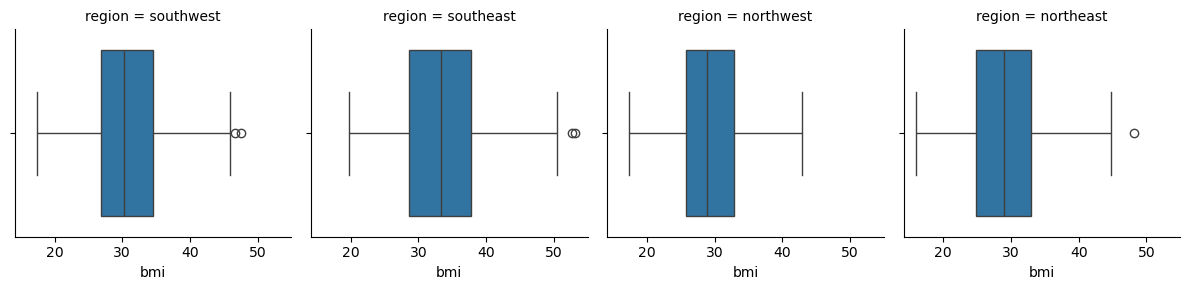

In [43]:
# Facet grid to analyze outliers

grid=sns.FacetGrid(data=Insurance, col='region')
grid.map(sns.boxplot, 'bmi')
plt.show()

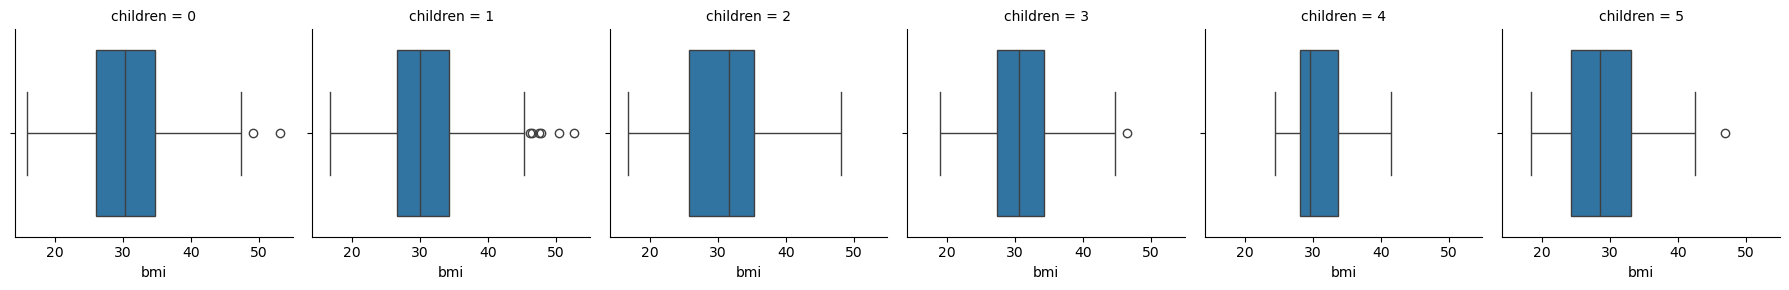

In [45]:
# Facet grid to analyze outliers

grid=sns.FacetGrid(data=Insurance, col='children')
grid.map(sns.boxplot, 'bmi')
plt.show()

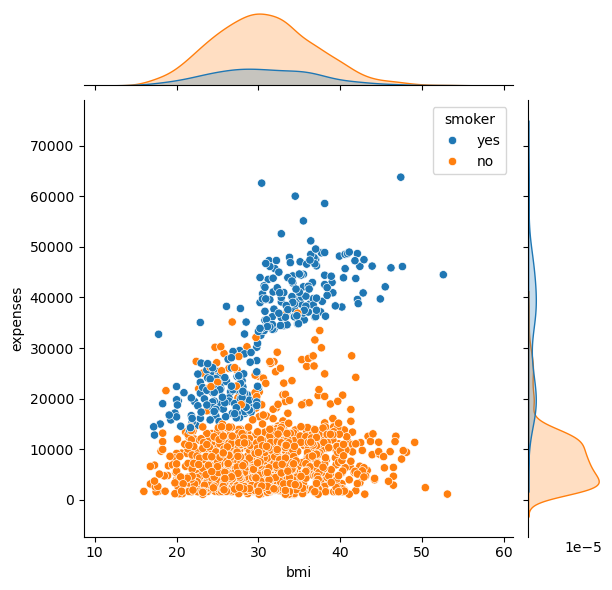

In [47]:
# Jointplot of BMI vs Charges 

sns.jointplot(data=Insurance, x='bmi', y='expenses', hue='smoker', kind='scatter')
plt.show()

In [49]:
# Pairwise correlation of variables

sns.heatmap(Insurance.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'female'

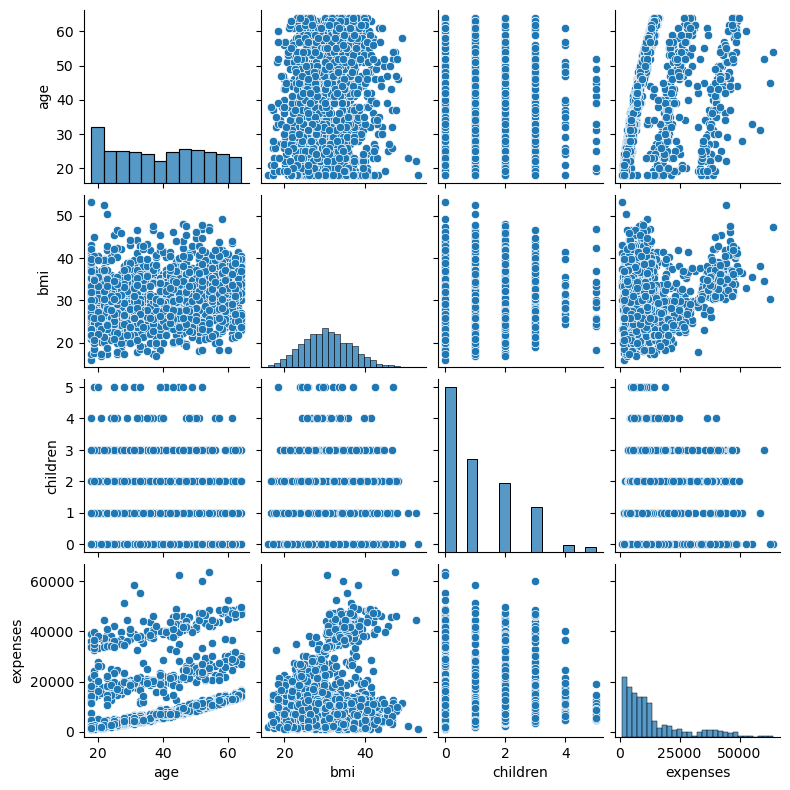

In [51]:
# Pairwise relationship in dataset

sns.pairplot(Insurance, height=2)
plt.show()

In [53]:
pd.pivot_table(Insurance, index='region', values='bmi' ,columns='sex', aggfunc='mean', margins=True)

sex           female       male        All
region                                    
northeast  29.331056  29.023313  29.176235
northwest  29.277439  29.124845  29.201846
southeast  32.673143  33.994709  33.359341
southwest  30.060494  31.129448  30.596615
All        30.379758  30.945266  30.665471

In [55]:
pd.pivot_table(Insurance, index='smoker', values='expenses' ,columns='sex', aggfunc='mean', margins=True)

sex           female          male           All
smoker                                          
no       8762.297367   8087.204971   8434.268449
yes     30678.996261  33042.006226  32050.231971
All     12569.578897  13956.751420  13270.422414

In [57]:
# checking normality of data
# null hypothesis: the data was drawn from a normal distribution.

print('Skewness of data: ', stats.skew(Insurance[['bmi','age']]))
print('Kurtosis of data: ', stats.kurtosis(Insurance[['bmi','age']]))
print('Shapiro test for normality: ', stats.shapiro(Insurance[['bmi','age']]))

Skewness of data:  [0.28427381 0.05561008]
Kurtosis of data:  [-0.05765193 -1.24492068]
Shapiro test for normality:  ShapiroResult(statistic=0.9401656004867176, pvalue=1.3727946347476911e-31)


In [59]:
# checking correlation of dependant and Independant variables
# null hypothesis: the distributions underlying the samples are uncorrelated

print('Pearson correlation of age',stats.stats.pearsonr(Insurance.age, Insurance.expenses))
print('Pearson correlation of bmi',stats.stats.pearsonr(Insurance.bmi, Insurance.expenses))
print('Pearson correlation of children',stats.stats.pearsonr(Insurance.children, Insurance.expenses))

Pearson correlation of age PearsonRResult(statistic=0.2990081922850827, pvalue=4.886695589990823e-29)
Pearson correlation of bmi PearsonRResult(statistic=0.19857625501893206, pvalue=2.3018280735119614e-13)
Pearson correlation of children PearsonRResult(statistic=0.06799823000532812, pvalue=0.012852124336017366)


In [61]:
#Pre-processing of data

In [63]:
# Check for missing values

Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [65]:
# Checking for duplicated rows

Insurance.duplicated().any()

True

In [67]:
# Dropping duplicate rows and rows containing nulls

Insurance.drop_duplicates(keep='first', inplace=True)
Insurance.dropna(inplace=True)

In [69]:
# New variavle 'weight_status' will be created based on BMI values

l=[]
for i in Insurance.bmi:
    if i>29.90:
        l.append('obesity')
    elif i<18.50:
        l.append('underweight')
    elif i>18.50 and i<24.90:
        l.append('healthy_weight')
    else:
        l.append('overweight')
        
Insurance['weight_status'] = l  # Adding new variable to the dataframe 

In [71]:
Insurance.head()

age     sex   bmi  children smoker     region  expenses   weight_status
0   19  female  27.9         0    yes  southwest  16884.92      overweight
1   18    male  33.8         1     no  southeast   1725.55         obesity
2   28    male  33.0         3     no  southeast   4449.46         obesity
3   33    male  22.7         0     no  northwest  21984.47  healthy_weight
4   32    male  28.9         0     no  northwest   3866.86      overweight

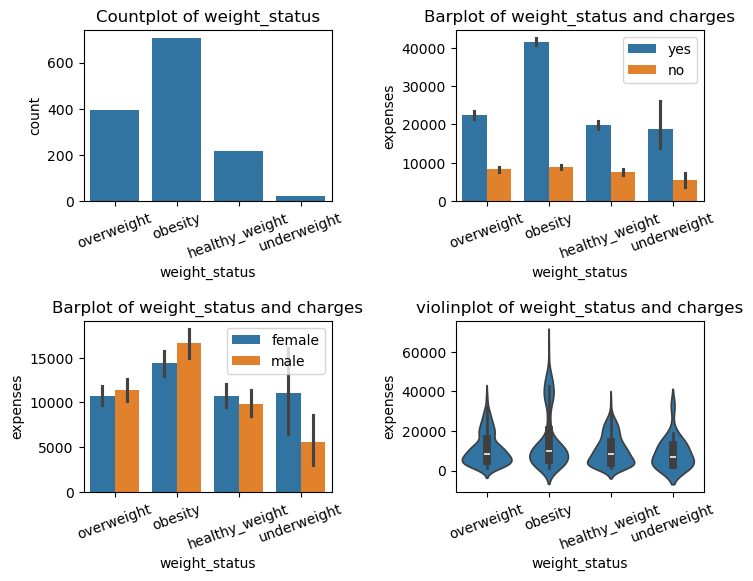

In [73]:
# Weight_status analysis

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.countplot(data=Insurance, x='weight_status')
plt.title('Countplot of weight_status')
plt.xticks(rotation=20)

plt.subplot(2,2,2)
sns.barplot(data=Insurance, x='weight_status', y='expenses', hue='smoker')
plt.title('Barplot of weight_status and charges')
plt.legend(loc='upper right')
plt.xticks(rotation=20)

plt.subplot(2,2,3)
sns.barplot(data=Insurance, x='weight_status', y='expenses', hue='sex')
plt.title('Barplot of weight_status and charges')
plt.legend(loc='upper right')
plt.xticks(rotation=20)

plt.subplot(2,2,4)
sns.violinplot(data=Insurance, x='weight_status', y='expenses')
plt.title('violinplot of weight_status and charges')
plt.xticks(rotation=20)

pl.subplots_adjust(hspace=0.7, wspace=0.5)
plt.show()

In [75]:
#Outliers removal

In [77]:
# Using Inter Quartile Range

def Inter_Quartile_Range_method(data_frame, variable):
    Q1 = np.quantile(data_frame[variable], 0.25)
    Q3 = np.quantile(data_frame[variable], 0.75)
    IQR = Q3 - Q1
    Lower_range = Q1 - 1.5*IQR  
    Upper_range = Q3 + 1.5*IQR
    global outlier_free_df
    outlier_free_list = [x for x in data_frame[variable] if ( (x < (Q3 + 1.5*IQR) ) & (x > (Q1 - 1.5*IQR) ) )]
    print('New shape is ',len(outlier_free_list))
    print( round(( (data_frame.shape[0]-len(outlier_free_list) )/data_frame.shape[0])*100,2),'% of data is removed')
    outlier_free_df = data_frame[data_frame[variable].isin(outlier_free_list)]
    return outlier_free_df 

In [79]:
# Calling the function

Inter_Quartile_Range_method(Insurance, 'bmi')

New shape is  1328
0.67 % of data is removed


age     sex   bmi  children smoker     region  expenses   weight_status
0      19  female  27.9         0    yes  southwest  16884.92      overweight
1      18    male  33.8         1     no  southeast   1725.55         obesity
2      28    male  33.0         3     no  southeast   4449.46         obesity
3      33    male  22.7         0     no  northwest  21984.47  healthy_weight
4      32    male  28.9         0     no  northwest   3866.86      overweight
...   ...     ...   ...       ...    ...        ...       ...             ...
1333   50    male  31.0         3     no  northwest  10600.55         obesity
1334   18  female  31.9         0     no  northeast   2205.98         obesity
1335   18  female  36.9         0     no  southeast   1629.83         obesity
1336   21  female  25.8         0     no  southwest   2007.95      overweight
1337   61  female  29.1         0    yes  northwest  29141.36      overweight

[1328 rows x 8 columns]

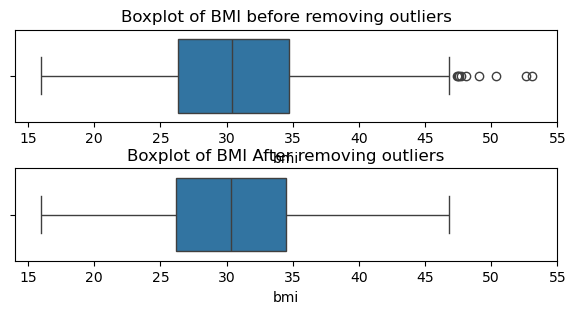

In [81]:
# New data frame name is 'outlier_free_df'
# Visualizing outliers

plt.figure(figsize=(7,3))
plt.subplot(2,1,1)
sns.boxplot(Insurance.bmi, orient='h')
plt.xlim((14,55))
plt.title('Boxplot of BMI before removing outliers')

plt.subplot(2,1,2)
sns.boxplot(outlier_free_df.bmi, orient='h')
plt.xlim((14,55))
plt.title('Boxplot of BMI After removing outliers')

pl.subplots_adjust(hspace=0.5)

In [83]:
# Dataset have four catagorical variables namely 'sex', 'smoker', 'region' and 'weight_status'. 

In [85]:
# Creating a copy of dataset before conversion
Insurance1 = outlier_free_df.copy(deep=True)
outlier_free_df_catagorical = outlier_free_df.select_dtypes(include='object')
outlier_free_df_numerical = outlier_free_df.select_dtypes(include=['float', 'int'])

In [87]:
Insurance1.weight_status.unique()

array(['overweight', 'obesity', 'healthy_weight', 'underweight'],
      dtype=object)

In [89]:
# Mapping numerical values 
outlier_free_df['sex'] = outlier_free_df.sex.map({'female':1, 'male':0})
outlier_free_df['smoker'] = outlier_free_df.smoker.map({'yes':1, 'no':0})
outlier_free_df['region'] = outlier_free_df.region.map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
outlier_free_df['weight_status'] = outlier_free_df.weight_status.map({'overweight':0, 'obesity':1, 'healthy_weight':2, 'underweight':3})

In [91]:
outlier_free_df.head()

age  sex   bmi  children  smoker  region  expenses  weight_status
0   19    1  27.9         0       1       0  16884.92              0
1   18    0  33.8         1       0       1   1725.55              1
2   28    0  33.0         3       0       1   4449.46              1
3   33    0  22.7         0       0       2  21984.47              2
4   32    0  28.9         0       0       2   3866.86              0

In [93]:
# Here we are going to perform Linear Regression (statistical model) therefore will use Standerdization

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
outlier_free_df[['age','bmi']] = standard.fit_transform(outlier_free_df[['age','bmi']])

In [95]:
outlier_free_df.head()

age  sex       bmi  children  smoker  region  expenses  weight_status
0 -1.440429    1 -0.445829         0       1       0  16884.92              0
1 -1.511669    0  0.550765         1       0       1   1725.55              1
2 -0.799261    0  0.415633         3       0       1   4449.46              1
3 -0.443056    0 -1.324183         0       0       2  21984.47              2
4 -0.514297    0 -0.276915         0       0       2   3866.86              0

In [97]:
# Splitting the data
x = outlier_free_df.drop('expenses', axis=1)
y = outlier_free_df['expenses']

In [99]:
# checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
  
vif_data

feature       VIF
0            age  1.017415
1            sex  1.657289
2            bmi  1.040657
3       children  1.592128
4         smoker  1.210118
5         region  2.096041
6  weight_status  2.089622

In [101]:
# Using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

selector = RFE(estimator=lr, n_features_to_select=1)
selector.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [103]:
feature_selection_rfe = pd.DataFrame({'features':x.columns, 'support':selector.support_, 'ranking':selector.ranking_})
feature_selection_rfe

features  support  ranking
0            age    False        2
1            sex    False        7
2            bmi    False        3
3       children    False        4
4         smoker     True        1
5         region    False        6
6  weight_status    False        5

In [105]:
# splitting data into train and test set
# Using 80-20 split

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
print('train_x shape is:',train_x.shape)
print('train_y shape is:',train_y.shape)
print('test_x shape is:',test_x.shape)
print('test_y shape is:',test_y.shape)

train_x shape is: (1062, 7)
train_y shape is: (1062,)
test_x shape is: (266, 7)
test_y shape is: (266,)


In [109]:
# This is a Linear Regression problem so we will use 4 models for predicting Insurance charges

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

In [111]:
# training the model
lr = LinearRegression()
lr = lr.fit(train_x, train_y)

In [113]:
print('The coefficient of determination of train data is:',lr.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr.score(test_x, test_y))

The coefficient of determination of train data is: 0.7511751868217464
The coefficient of determination of test data is: 0.7455562554175292


In [115]:
# predicting on test data
lr_predict = lr.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 35367359.49
Mean Absolute Error is: 4074.89
Mean Absolute Percentage Error is: 0.4
Root Mean Squared Error is: 5947.05
Adjusted r squared score: 0.74


In [117]:
#Model 2

In [119]:
# Removing sex variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop('sex', axis=1), y, test_size=0.2, random_state=42)

In [121]:
# training the model
lr_2 = LinearRegression()
lr_2 = lr_2.fit(train_x, train_y)

In [123]:
print('The coefficient of determination of train data is:',lr_2.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_2.score(test_x, test_y))

The coefficient of determination of train data is: 0.7511738801161394
The coefficient of determination of test data is: 0.7455461397292835


In [125]:
# predicting on test data
lr_2_predict = lr_2.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_2_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_2_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_2_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_2_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_2_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_2_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 35368765.56
Mean Absolute Error is: 4076.85
Mean Absolute Percentage Error is: 0.4
Root Mean Squared Error is: 5947.16
Adjusted r squared score: 0.74


In [127]:
#Model 3

In [129]:
# Removing sex and region variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop(['sex','region'], axis=1), y, test_size=0.2, random_state=42)

In [131]:
# training the model
lr_3 = LinearRegression()
lr_3 = lr_3.fit(train_x, train_y)

In [133]:
lr_3.coef_

array([ 3647.30494931,  2002.32811269,   511.18290322, 23715.42892699,
         452.74704018])

In [135]:
print('The coefficient of determination of train data is:',lr_3.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_3.score(test_x, test_y))

The coefficient of determination of train data is: 0.748992512257238
The coefficient of determination of test data is: 0.7501954025600841


In [137]:
# predicting on test data
lr_3_predict = lr_3.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_3_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_3_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_3_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_3_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_3_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_3_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 34722523.89
Mean Absolute Error is: 3979.78
Mean Absolute Percentage Error is: 0.38
Root Mean Squared Error is: 5892.58
Adjusted r squared score: 0.75


In [139]:
#Model 4

In [141]:
# Removing sex, region and weight_status variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop(['sex','region','weight_status'], axis=1), y, test_size=0.2, random_state=42)

In [143]:
# training the model
lr_4 = LinearRegression()
lr_4 = lr_4.fit(train_x, train_y)

In [145]:
print('The coefficient of determination of train data is:',lr_4.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_4.score(test_x, test_y))

The coefficient of determination of train data is: 0.7482966161878246
The coefficient of determination of test data is: 0.749379718812633


In [147]:
# predicting on test data
lr_4_predict = lr_4.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_4_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_4_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_4_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_4_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_4_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_4_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 34835902.9
Mean Absolute Error is: 4045.1
Mean Absolute Percentage Error is: 0.39
Root Mean Squared Error is: 5902.19
Adjusted r squared score: 0.75


In [149]:
#Model 5

In [151]:
# Removing sex, region, weight_status and children variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop(['sex','region','weight_status', 'children'], axis=1), y, test_size=0.2, random_state=42)

In [153]:
# training the model
lr_5 = LinearRegression()
lr_5 = lr_5.fit(train_x, train_y)

In [155]:
print('The coefficient of determination of train data is:',lr_5.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_5.score(test_x, test_y))

The coefficient of determination of train data is: 0.7455889041057422
The coefficient of determination of test data is: 0.7488207926581287


In [157]:
# predicting on test data
lr_5_predict = lr_5.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_5_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_5_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_5_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_5_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_5_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_5_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 34913592.93
Mean Absolute Error is: 4091.97
Mean Absolute Percentage Error is: 0.4
Root Mean Squared Error is: 5908.77
Adjusted r squared score: 0.75


In [159]:
# Evaluating models on all parameters

evaluation_metrics = pd.DataFrame({'Model':[1, 2, 3, 4, 5], 
                                   'train_acc':[0.75, 0.75, 0.74, 0.74, 0.74], 
                                   'test_acc':[0.74, 0.74, 0.75, 0.74, 0.74], 
                                   'r^2':[0.75, 0.75, 0.75, 0.75, 0.75], 
                                   'MSE':[35336342.86, 35337354.79, 34677818.83, 34837442.51, 34916425.26], 
                                   'MAE':[4078.82, 4080.33, 3983.46, 4044.32, 4091.59], 
                                   'MAPE':[0.4, 0.4, 0.38, 0.39, 0.4],
                                   'RMSE':[5944.44, 5944.52, 5888.79, 5902.33, 5909.01], 
                                   'adjusted_r2':[0.74, 0.74, 0.75, 0.75, 0.75]
                                  }).set_index('Model')

evaluation_metrics

train_acc  test_acc   r^2          MSE      MAE  MAPE     RMSE  \
Model                                                                   
1           0.75      0.74  0.75  35336342.86  4078.82  0.40  5944.44   
2           0.75      0.74  0.75  35337354.79  4080.33  0.40  5944.52   
3           0.74      0.75  0.75  34677818.83  3983.46  0.38  5888.79   
4           0.74      0.74  0.75  34837442.51  4044.32  0.39  5902.33   
5           0.74      0.74  0.75  34916425.26  4091.59  0.40  5909.01   

       adjusted_r2  
Model               
1             0.74  
2             0.74  
3             0.75  
4             0.75  
5             0.75

In [161]:
evaluation_metrics.sort_values(by='RMSE', axis=0, ascending=True)

train_acc  test_acc   r^2          MSE      MAE  MAPE     RMSE  \
Model                                                                   
3           0.74      0.75  0.75  34677818.83  3983.46  0.38  5888.79   
4           0.74      0.74  0.75  34837442.51  4044.32  0.39  5902.33   
5           0.74      0.74  0.75  34916425.26  4091.59  0.40  5909.01   
1           0.75      0.74  0.75  35336342.86  4078.82  0.40  5944.44   
2           0.75      0.74  0.75  35337354.79  4080.33  0.40  5944.52   

       adjusted_r2  
Model               
3             0.75  
4             0.75  
5             0.75  
1             0.74  
2             0.74

In [165]:
#Looking at above table of evaluation parameters it is clear that model 3 gives better results.Model 3 is trained without 'sex' and 'region' variables.
#Coefficient of determination value of model 3 is 0.75 and RMSE is 5888.

In [163]:
# Independence of errors assumptions : Durbin watson test
# null hypothesis: there is no serial correlation in the residuals.

from statsmodels.stats.stattools import durbin_watson
error = test_y-lr_3_predict
print('Durbin watson test: ', durbin_watson(error))

Durbin watson test:  1.9389966098552476


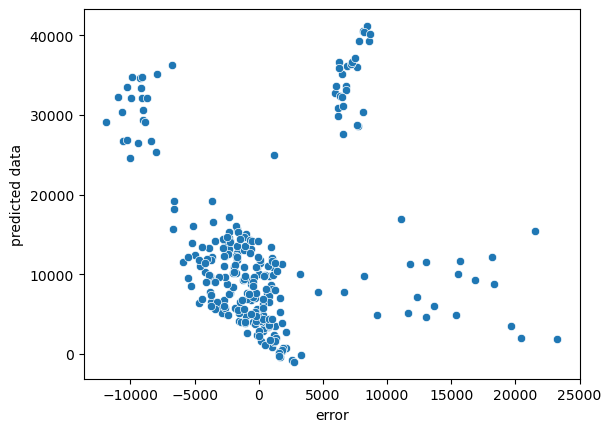

In [167]:
# cheking assumption of homoscadacity 

error = test_y-lr_3_predict
sns.scatterplot(x=error, y=lr_3_predict)
plt.xlabel('error')
plt.ylabel('predicted data')
plt.show()

In [169]:
#Durbin watson value of 1.5 to 2.5 shows that there is no autocorrelation in data.
#from above test durbin watson value is 1.93 which is falling in above range.
#for checking the assumption of homoscadacity we have ploted scatterplot of residuals and predicted data.
#from scatterplot it is clear that varience is not same for all predicted data points and hence there is a need for transformation of model for improving accuracy of model.

In [171]:
# regression equation 

# y = 7396.67 + age*3646.48 + bmi*1997.31 + children*512.39 + smoker*23719.12 + weight_status*409.96

In [173]:
predicted = pd.DataFrame({'Actual':round(test_y, 2), 'predicted':lr_3_predict, 'error':round(error,2)})
predicted

Actual     predicted     error
1210   5373.36   7614.226011  -2240.87
115   30260.00  12108.480161  18151.52
986    8410.05  10184.875201  -1774.83
176    6455.86   7143.848936   -687.99
63     4133.64   3391.672135    741.97
...        ...           ...       ...
1153   5630.46   9011.675370  -3381.22
556    8334.59  11058.152964  -2723.56
1206  36910.61  15420.730652  21489.88
584    1242.82   -311.305131   1554.13
1022  42211.14  35946.617893   6264.52

[266 rows x 3 columns]

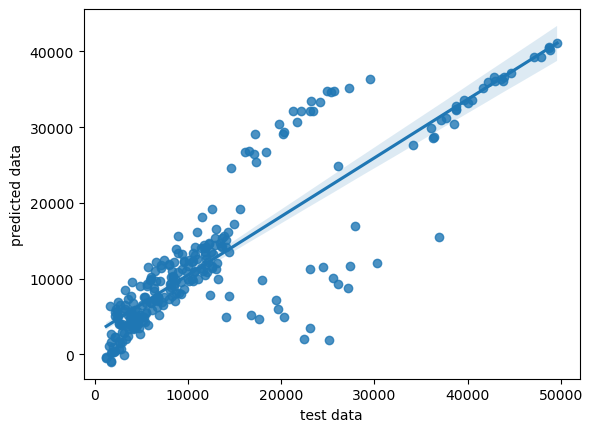

In [175]:
# Visualizing regression plot

sns.regplot(x=test_y, y=lr_3_predict)
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.show()